# Part II - (Ford GoBike System Data Exploration
## par (N'da kouassi jean jaures mickael)

## Investigation Overview

> Dans cette enquête, je voulais examiner l'heure de la journée et le jour de la semaine où la plupart des trajets effectués, combien de temps dure le trajet moyen et voir si les résultats des enquêtes les plus anciennes dépendent du fait qu'un utilisateur soit abonné ou un client.

## Dataset Overview

Après une bonne préparation des données pour l'exploration, l'ensemble de données contient 183.412 lignes et 12 colonnes :
- start_time (dateheure).
- end_time (dateheure)    
- start_station_name (objet)
- end_station_name (objet)
- user_type (catégoriel) - Abonné et Client.
- member_gender (catégoriel) - Masculin, Féminin et Autre

De plus, de nouvelles colonnes ont été créées :
- day_of_week : pour stocker le numéro du jour de la semaine à partir de start_time.
- start_hour : pour stocker le numéro d'heure à partir de start_time.
- time_of_day : pour stocker l'heure du jour à partir de start_hour
- duration_min : pour stocker la durée en minutes.
- user_age : pour stocker l'âge de l'utilisateur du membre
- user_age_bin : âges groupés/binnés pour l'exploration des tranches d'âge

In [56]:
# importez tous les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# supprimer les avertissements de la sortie finale
import warnings
warnings.simplefilter("ignore")

In [57]:
# charger l'ensemble de données
data_bike = pd.read_csv('news-201902-fordgobike-tripdata.csv')

## la plupart des trajets effectués en termes de jour de la semaine

> Le jour de la semaine avec le plus de trajets est le **jeudi** suivi du mardi et du mercredi.

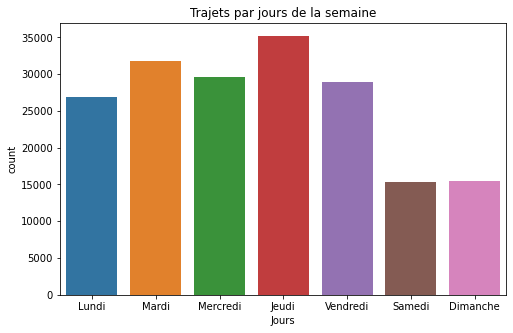

In [58]:
weekday = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
# répartition du tracé du jour de la semaine
plt.figure(figsize=[8, 5])
sb.countplot(data = data_bike, x = 'day_of_week', order=weekday)
plt.title('Trajets par jours de la semaine')
plt.xlabel('Jours')
plt.show();

## la plupart des trajets effectués en termes d'heure de la journée

> L'heure de la journée avec le plus de trajets est l'après-midi (12h00 - 17h59 de la journée) suivi du matin (00h00 - 11h59 de la journée) avec très peu de différence par rapport à l'après-midi.

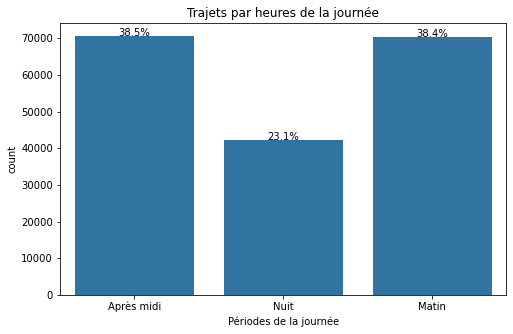

In [59]:
# distribution du tracé du jour de la semaine
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = data_bike, x = 'time_of_day', color = base_color)
n_points = data_bike.shape[0]
user_counts = data_bike['time_of_day'].value_counts()
locs, labels = plt.xticks()

# fréquence d'impression sur le graphique à barres
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center')

plt.title('Trajets par heures de la journée')
plt.xlabel('Périodes de la journée')
plt.show();

## Répartition de la durée
La plupart des trajets ont duré environ (9-12) minutes. Et très peu de manèges ont duré plus d'une heure (60 minutes). Après normalisation par conversion de seconde en minute puis mise en logarithme, la distribution des durées de trajet prend une forme unimodale.


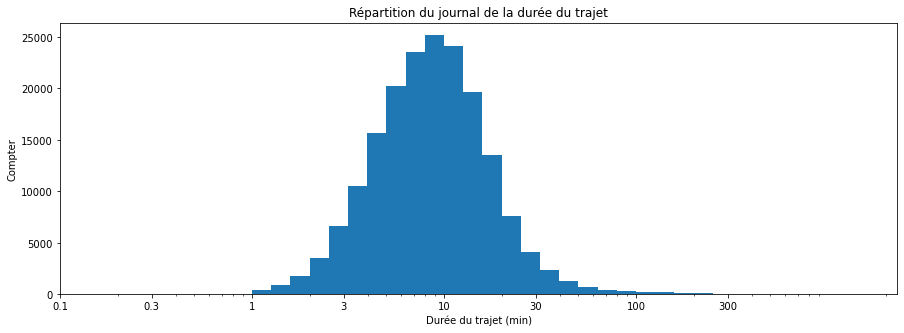

In [60]:
# distribution de la durée du trajet en échelle logarithmique
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(data_bike['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[15, 5])
plt.hist(data = data_bike, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Durée du trajet (min)')
plt.ylabel('Compter')
plt.title('Répartition du journal de la durée du trajet')
plt.show();

## L'heure de la journée à laquelle la plupart des trajets sont effectués dépend-elle du fait qu'un utilisateur soit un abonné ou un client ?

L'heure de la journée à laquelle la plupart des trajets sont effectués (après-midi et matin) dépend légèrement du fait qu'un utilisateur soit un abonné ou un client. Il a été réalisé que les clients commencent souvent le voyage l'après-midi alors que les abonnés commencent généralement le voyage le matin.

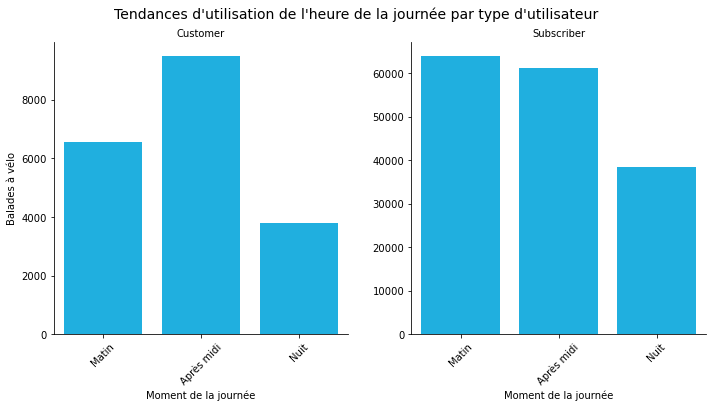

In [61]:
day_time = ['Matin', 'Après midi', 'Nuit']
g = sb.catplot(data=data_bike, x='time_of_day', col="user_type", kind='count', sharey = False, color = 'deepskyblue', order = day_time)
g.set_axis_labels("Moment de la journée", "Balades à vélo")
g.set_titles("{col_name}")
g.fig.suptitle("Tendances d'utilisation de l'heure de la journée par type d'utilisateur", y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);

## Le jour de la semaine où la plupart des trajets sont effectués dépend-il du fait qu'un utilisateur soit un abonné ou un client ?

Le jour de la semaine où la plupart des trajets sont effectués (jeudi) ne dépend PAS du fait qu'un utilisateur soit un abonné ou un client. Il a été découvert que les clients utilisent souvent le service pendant les week-ends alors que les abonnés utilisent principalement le service pendant les jours de semaine normaux du lundi au vendredi.

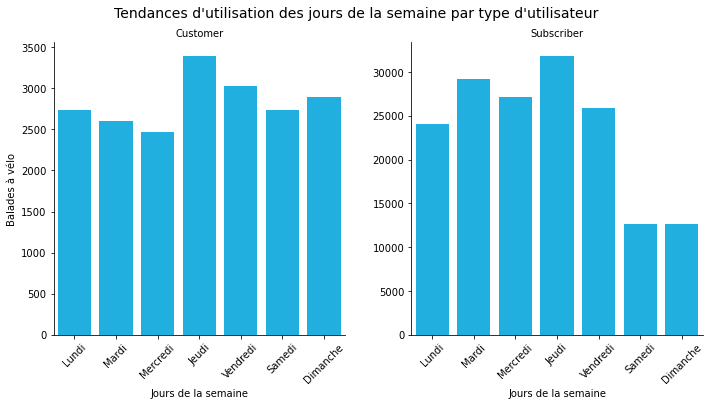

In [62]:
g = sb.catplot(data=data_bike, x='day_of_week', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = weekday)
g.set_axis_labels("Jours de la semaine", "Balades à vélo")
g.set_titles("{col_name}")
g.fig.suptitle("Tendances d'utilisation des jours de la semaine par type d'utilisateur", y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);

## La durée moyenne du trajet effectué dépend-elle du fait qu'un utilisateur est un abonné ou un client ?

La durée moyenne du trajet dépend fortement du fait qu'un utilisateur soit un abonné ou simplement un client. En moyenne, les clients (24 minutes) ont deux fois la durée du trajet des abonnés (10 minutes), c'est-à-dire que les utilisateurs abonnés ont tendance à faire du vélo moins longtemps que les utilisateurs clients.

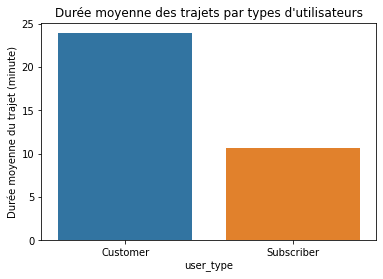

In [63]:
# Tracé moyen de la durée moyenne du trajet
grouped_user_type_duration = data_bike[['user_type','duration_min']].groupby(['user_type'],as_index= False).mean()
sb.barplot(x='user_type', y='duration_min', data=grouped_user_type_duration)
plt.title("Durée moyenne des trajets par types d'utilisateurs")
plt.ylabel("Durée moyenne du trajet (minute)")
plt.show();

## Durée du voyage quotidien

Étant donné que l'utilisateur Customers effectue principalement des trajets le week-end (samedi et dimanche) et effectue également des trajets plus longs, on s'attend à ce que la durée moyenne du trajet soit alors la plus élevée le week-end. 

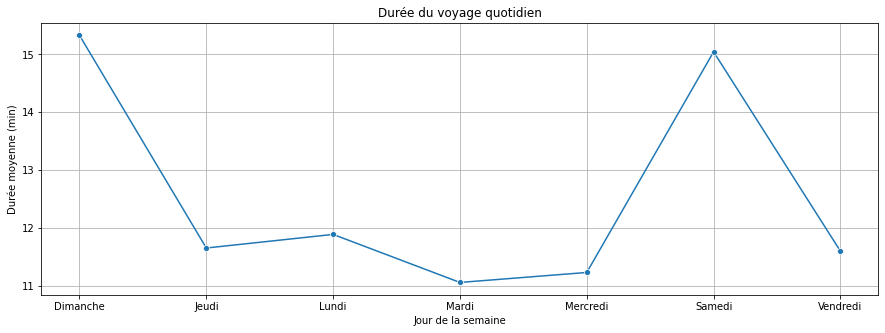

In [64]:
weekday_avg_min = data_bike[['day_of_week','duration_min']].groupby(['day_of_week'],as_index= False).mean()
# plot a line plot
plt.figure(figsize=[15,5])
sb.lineplot(data=weekday_avg_min, x='day_of_week', y='duration_min',marker='o')
plt.ylabel('Durée moyenne (min)');
plt.xlabel('Jour de la semaine')
plt.grid()
plt.title('Durée du voyage quotidien')
plt.show();

## Durée quotidienne moyenne du trajet pour chaque user_type

En moyenne, les trajets des clients ont duré plus longtemps que les trajets des abonnés tous les jours de la semaine.

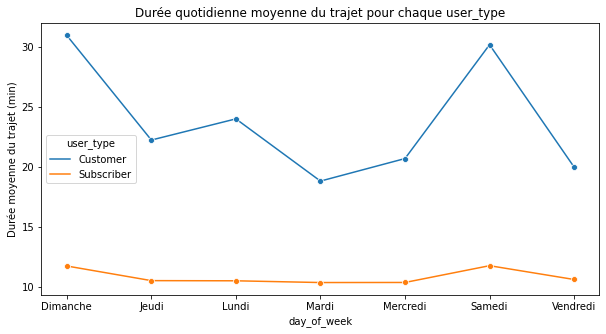

In [65]:
user_weekday_avg_min = data_bike.groupby(['user_type','day_of_week']).duration_min.mean()
user_weekday_avg_min = user_weekday_avg_min.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = user_weekday_avg_min, x='day_of_week', y='duration_min', hue='user_type', marker='o')
plt.title("Durée quotidienne moyenne du trajet pour chaque user_type")
plt.ylabel('Durée moyenne du trajet (min)');